<a href="https://colab.research.google.com/github/18018183uhi/18018183_DataAnalytics2024/blob/main/Assignment_2_18018183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
To test the data collected and collated in Assignment 1, both Linear Regression and Deep Neural Network models will be created, testing the data values to determine which are most helpful in predicting the number of collisions.

In [238]:
# needed to create the data frame
import pandas as pd

# needed to help with speedy maths based calculations
import numpy as np

# Import for model creation using tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# create data frames from csv files hosted on github
# In assignment 1, four different csv files were created, but only one is required. Other test and training sets can be created be specifying specific columns.
LRDdf = pd.read_csv('https://raw.githubusercontent.com/18018183uhi/18018183_DataAnalytics2024/main/LRD.csv', index_col=0, )

In [239]:
# make sure we have our data by printing it out
print(LRDdf[:6])

     day  mo  temp  visib  wdsp  NUM_COLLISIONS
191    1   1  35.9    8.8   8.5        0.361194
198    1   1  47.2    1.3   8.2        0.423881
212    1   1  27.3    8.8   7.4        0.319403
555    1   1  46.3    2.5  14.8        0.347561
576    1   1  38.8    8.8  12.3        0.326220
919    1   1  44.0    7.6  16.3        0.255319


# Initial Linear Regression Model
To verify which values have the most impact on developing an accurate prediction model, several linear regression models will be created and tested. To begin, a model will be created that uses all available data columns, with the rows shuffled to prevent any accidental bias. The same shuffled data will be used for every model, though the values chosen will vary.

In [240]:
# Variables used
# day - day of the week
# mo - month of the year
# temp - mean temperature
# visib - visibility in miles
# wdsp - average wind speed


# iloc allows us to select by rows. Here, we are shuffling the data by rows determined at random.
shuffle = LRDdf.iloc[np.random.permutation(len(LRDdf))]
# print out the shuffled data (first 5 rows)
shuffle[:5]


,day,mo,temp,visib,wdsp,NUM_COLLISIONS
1220,1,11,58.3,9.5,7.8,0.561170
907,3,12,50.7,2.1,10.2,0.350610
2695,6,11,39.7,10.0,18.4,0.330709
1506,7,8,75.3,4.6,9.9,0.243169
1744,7,4,46.3,10.0,10.5,0.218509


To create the model, we must determine a set of predictors- the values used to predict the number of collisions. For this first model, that is every other value.

In [241]:
# we are selecting all rows of the columns that are not the count or the num_collisions
predictors = shuffle.iloc[:,0:5]
# print out the first 6 rows of predictors.
print(predictors[:6])

      day  mo  temp  visib  wdsp
1220    1  11  58.3    9.5   7.8
907     3  12  50.7    2.1  10.2
2695    6  11  39.7   10.0  18.4
1506    7   8  75.3    4.6   9.9
1744    7   4  46.3   10.0  10.5
1172    2   9  70.8   10.0  10.1


We also need a set of targets the predictors are used to attempt to predict - the number of collisions.

In [242]:
# Select all rows for the 2nd column (i.e. 1)
targets = shuffle.iloc[:,5:6]

# print out the first 6 rows of the targets data.
print(targets[:6])

      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745


The creation of the linear regression model follows a set of steps that will be repeated for every new model, training on 80% of the data and testing on 20%. The main way to evaluate these models are using the Mean Absolute Error - how far on average the predicted values drift from the actual values.

It should be noted that the NUM_COLLISIONS value has been normalised to be between 0 and 1. It is the only data value that has been normalised.

In [243]:
# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data = [LRDdf["day"], LRDdf["mo"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers = ["day", "mo", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input = pd.concat(LRDdf_input_data, axis=1, keys=LRDdf_input_headers)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set = LRDdf_input.sample(frac=0.8, random_state=0)
test_set = LRDdf_input.drop(training_set.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features = training_set.copy()
test_features = test_set.copy()

training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

# I have decided to call the model, model1. We add our normaliser and we are expecting a single output.
model1 = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

model1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = model1.fit(
    training_features,
    training_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_model1 = model1.evaluate(
    test_features,
    test_labels, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_model1)

0.16463255882263184


Due to randomisation, the Mean Absolute Error will change every time the model is run. In order to more accurately evaluate each model, they will be run multiple times and the MAE recorded in a table, rounded to 4 decimal places. The table below records the MAE for model1.

| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.1664  |
| 2    | 0.1648     |
| 3    | 0.1711     |
| 4    | 0.1804     |
| 5    | 0.1741     |
| 6    | 0.1901  |
| 7    | 0.1643     |
| 8    | 0.1637     |
| 9    | 0.1682     |
| 10    | 0.1729     |

# Additional Linear Regression Models

Multiple additional linear regression models will be created and tested in order to test the accuracy of various combinations of values. They will have the Mean Absolute Error recorded, but no comparisons between models will be performed duing the model creation.


# Weather
Model values: Average Temperature, Visibility, and Average Wind Speed.

In [244]:
# Weather data, using temperature, visiblity and wind speed
# Predictors
predictorsW = shuffle.iloc[:,2:5]
print(predictorsW[:6])
# Targets
targetsW = shuffle.iloc[:,5:6]
print(targetsW[:6])

      temp  visib  wdsp
1220  58.3    9.5   7.8
907   50.7    2.1  10.2
2695  39.7   10.0  18.4
1506  75.3    4.6   9.9
1744  46.3   10.0  10.5
1172  70.8   10.0  10.1
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745


In [245]:
# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data1 = [LRDdf["temp"], LRDdf["visib"], LRDdf["wdsp"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers1 = ["temp", "visib", "wdsp", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input1 = pd.concat(LRDdf_input_data1, axis=1, keys=LRDdf_input_headers1)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set1 = LRDdf_input1.sample(frac=0.8, random_state=0)
test_set1 = LRDdf_input1.drop(training_set1.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features1 = training_set1.copy()
test_features1 = test_set1.copy()

training_labels1 = training_features1.pop('NUM_COLLISIONS')
test_labels1 = test_features1.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser1 = tf.keras.layers.Normalization(axis=-1)
normaliser1.adapt(np.array(training_features1))

# I have decided to call the model, modelW. We add our normaliser and we are expecting a single output.
modelW = tf.keras.Sequential([
    normaliser1,
    layers.Dense(units=1)
])

modelW.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelW.fit(
    training_features1,
    training_labels1,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelW = modelW.evaluate(
    test_features1,
    test_labels1, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelW)

0.19797053933143616




| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.1808  |
| 2    | 0.1905     |
| 3    | 0.1996     |
| 4    | 0.2004     |
| 5    | 0.1903     |
| 6    | 0.1872  |
| 7    | 0.1861     |
| 8    | 0.1805     |
| 9    | 0.1977     |
| 10    | 0.1856     |

# Season
Model values: Month and Average Temperature

In [246]:
# Season data, using month and temperature
# Predictors
predictorsS = shuffle.iloc[:,1:3]
print(predictorsS[:6])
# Targets
targetsS = shuffle.iloc[:,5:6]
print(targetsS[:6])

      mo  temp
1220  11  58.3
907   12  50.7
2695  11  39.7
1506   8  75.3
1744   4  46.3
1172   9  70.8
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745


In [247]:
# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data2 = [LRDdf["mo"], LRDdf["temp"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers2 = ["mo", "temp", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input2 = pd.concat(LRDdf_input_data2, axis=1, keys=LRDdf_input_headers2)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set2 = LRDdf_input2.sample(frac=0.8, random_state=0)
test_set2 = LRDdf_input2.drop(training_set2.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features2 = training_set2.copy()
test_features2 = test_set2.copy()

training_labels2 = training_features2.pop('NUM_COLLISIONS')
test_labels2 = test_features2.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser2 = tf.keras.layers.Normalization(axis=-1)
normaliser2.adapt(np.array(training_features2))

# I have decided to call the model, modelS. We add our normaliser and we are expecting a single output.
modelS = tf.keras.Sequential([
    normaliser2,
    layers.Dense(units=1)
])

modelS.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelS.fit(
    training_features2,
    training_labels2,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelS = modelS.evaluate(
    test_features2,
    test_labels2, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelS)

0.1839320957660675



| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.1806  |
| 2    | 0.1917  |
| 3    | 0.1814  |
| 4    | 0.2011  |
| 5    | 0.2068  |
| 6    | 0.1899  |
| 7    | 0.1910  |
| 8    | 0.1804  |
| 9    | 0.2177  |
| 10   | 0.1923  |

# Time
Model Values: Month and Day of Week

In [248]:
# Season data, using month and day of week
# Predictors
predictorsT = shuffle.iloc[:,0:2]
print(predictorsS[:6])
# Targets
targetsT = shuffle.iloc[:,5:6]
print(targetsS[:6])

      mo  temp
1220  11  58.3
907   12  50.7
2695  11  39.7
1506   8  75.3
1744   4  46.3
1172   9  70.8
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745


In [249]:
# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data3 = [LRDdf["mo"], LRDdf["day"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers3 = ["mo", "day", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input3 = pd.concat(LRDdf_input_data3, axis=1, keys=LRDdf_input_headers3)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set3 = LRDdf_input3.sample(frac=0.8, random_state=0)
test_set3 = LRDdf_input3.drop(training_set3.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features3 = training_set3.copy()
test_features3 = test_set3.copy()

training_labels3 = training_features3.pop('NUM_COLLISIONS')
test_labels3 = test_features3.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser3 = tf.keras.layers.Normalization(axis=-1)
normaliser3.adapt(np.array(training_features3))

# I have decided to call the model, modelT. We add our normaliser and we are expecting a single output.
modelT = tf.keras.Sequential([
    normaliser3,
    layers.Dense(units=1)
])

modelT.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelT.fit(
    training_features3,
    training_labels3,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelT = modelT.evaluate(
    test_features3,
    test_labels3, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelT)

0.1662096083164215



| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.1629  |
| 2    | 0.1813     |
| 3    | 0.1728     |
| 4    | 0.1646     |
| 5    | 0.1916     |
| 6    | 0.1762  |
| 7    | 0.1894  |
| 8    | 0.1931  |
| 9    | 0.1691  |
| 10   | 0.1684  |

# Comparing Linear Regression Models

With various models created, it is useful to compare the data to evaluate their accuracy compared to each other. The lower the Mean Absolute Error, the more accurately the model has predicted the values on average.

Examining the MAE for each of the models, Model1 and ModelT appear to be marginally superior to ModelW and ModelS in regards to accuracy.

| Instance    |  Model1  |  ModelW  |  ModelS  |  ModelT  |
|-------------|----------|----------|----------|----------|
| 1           |  0.1664  |  0.1808  |  0.1806  |  0.1629  |
| 2           |  0.1648  |  0.1905  |  0.1917  |  0.1813  |
| 3           |  0.1711  |  0.1996  |  0.1814  |  0.1728  |
| 4           |  0.1804  |  0.2004  |  0.2011  |  0.1646  |
| 5           |  0.1741  |  0.1903  |  0.2068  |  0.1916  |
| 6           |  0.1901  |  0.1872  |  0.1899  |  0.1762  |
| 7           |  0.1643  |  0.1861  |  0.1910  |  0.1894  |
| 8           |  0.1637  |  0.1805  |  0.1804  |  0.1931  |
| 9           |  0.1682  |  0.1977  |  0.2177  |  0.1691  |
| 10          |  0.1729  |  0.1856  |  0.1923  |  0.1684  |
| Average MAE |  0.1716  |  0.1901  |  0.1942  |  0.1769  |


To further compare accuracy, the predicted values of the test set are plotted against the actual values:

10/10 [==============================] - 0s 3ms/step


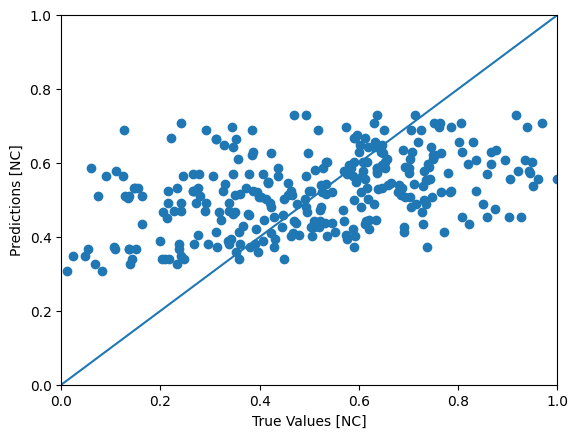

In [250]:
# Plot predictions against actual values

import matplotlib.pyplot as plt

# Overall Predictions
test_predictions = model1.predict(test_features).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

10/10 [==============================] - 0s 3ms/step


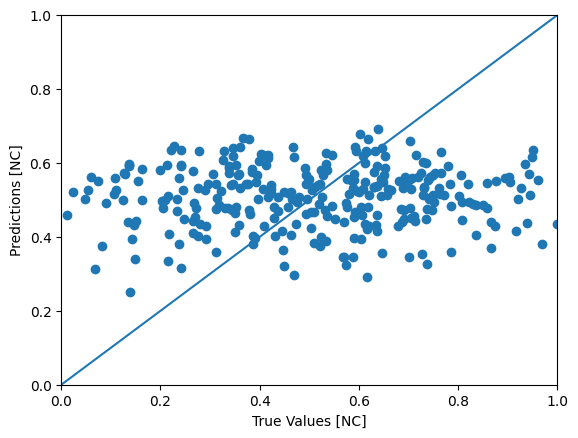

In [251]:
# Weather Predictions
test_predictions1 = modelW.predict(test_features1).flatten()
plt.scatter(test_labels1, test_predictions1)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


10/10 [==============================] - 0s 4ms/step


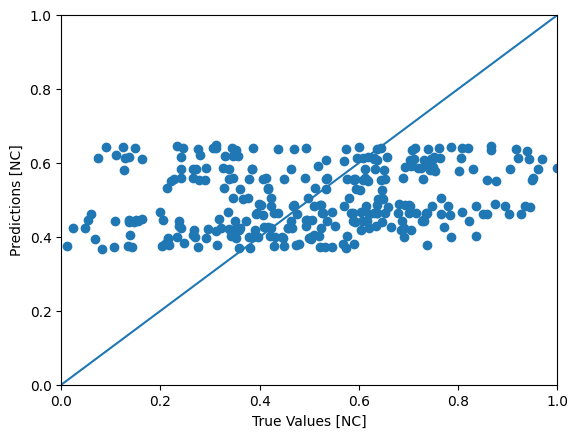

In [252]:
# Season Predictions
test_predictions2 = modelS.predict(test_features2).flatten()
plt.scatter(test_labels2, test_predictions2)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


10/10 [==============================] - 0s 4ms/step


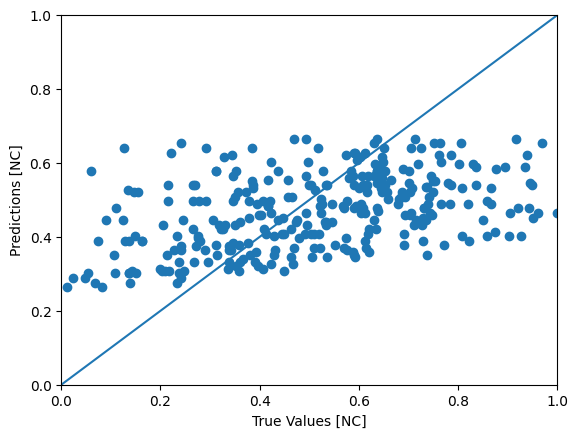

In [253]:
# Time Predictions
test_predictions3 = modelT.predict(test_features3).flatten()
plt.scatter(test_labels3, test_predictions3)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Admittedly, none of the models are particularly impressive in their predictions. The better the model, the more the values should match the line, and it is clear that none of the generated models perform particularly well. Placing all the plots on one graph, the trends and biases of each model can be seem and compared.

10/10 [==============================] - 0s 2ms/step


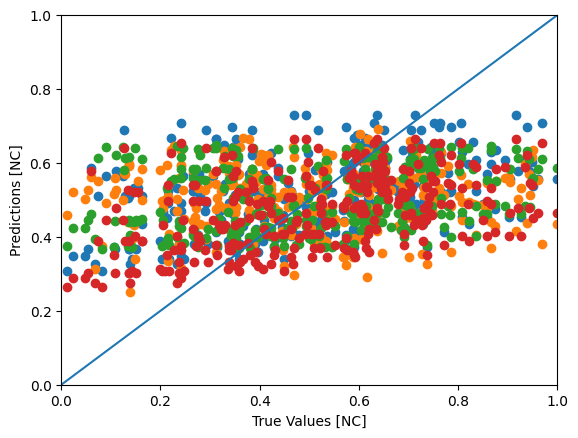

In [254]:
# Plot predictions against actual values

import matplotlib.pyplot as plt

# Overall Predictions
test_predictions = model1.predict(test_features).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
# Weather Predictions
test_predictions1 = modelW.predict(test_features1).flatten()
plt.scatter(test_labels1, test_predictions1)
# Season Predictions
test_predictions2 = modelS.predict(test_features2).flatten()
plt.scatter(test_labels2, test_predictions2)
# Time Predictions
test_predictions3 = modelT.predict(test_features3).flatten()
plt.scatter(test_labels3, test_predictions3)

Model1 (blue) has the lowest MAE and the widest range of predictions for both low and high values. This wide spread works in its favour for the MAE as the outliers on each end cancel each other out to some degree.

ModelW (orange) has the second highest MAE and follows a similar range for predictions to Model1, though with a tighter spread and higher predictions on average.

ModelS (green) has the higher MAE, and has abnormally lower predictions across all values.

ModelT (red) has the second lowest MAE and follows a similar range to ModelS.

Unfortunately, it seems that for Linear Regression modelling the chosen combinations of data do not appear to have very high accuracy in predictions, despite the correlation present in the date. In a final attempt to create a more accurate linear model, each individual value will be modelled.

# Individual Value Linear Models

The MAE to beat for accuracy is 0.1716, generated through 10 iterations of Model1.

In [255]:
# Day of Week data
# Predictors
predictorsDay = shuffle.iloc[:,0:1]
print(predictorsDay[:6])
# Targets
targetsDay = shuffle.iloc[:,5:6]
print(targetsDay[:6])

# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data4 = [LRDdf["day"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers4 = ["day", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input4 = pd.concat(LRDdf_input_data4, axis=1, keys=LRDdf_input_headers4)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set4 = LRDdf_input3.sample(frac=0.8, random_state=0)
test_set4 = LRDdf_input3.drop(training_set4.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features4 = training_set4.copy()
test_features4 = test_set4.copy()

training_labels4 = training_features4.pop('NUM_COLLISIONS')
test_labels4 = test_features4.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

# I have decided to call the model, modelDay. We add our normaliser and we are expecting a single output.
modelDay = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

modelDay.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelDay.fit(
    training_features4,
    training_labels4,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelDay = modelDay.evaluate(
    test_features4,
    test_labels4, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelDay)

      day
1220    1
907     3
2695    6
1506    7
1744    7
1172    2
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745
0.18333317339420319



| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.1725  |
| 2    | 0.1664  |
| 3    | 0.1659  |
| 4    | 0.1838  |
| 5    | 0.1781  |
| 6    | 0.1657  |
| 7    | 0.1749  |
| 8    | 0.1628  |
| 9    | 0.1679  |
| 10   | 0.1738  |
|Average | 0.1712 |

10/10 [==============================] - 0s 3ms/step


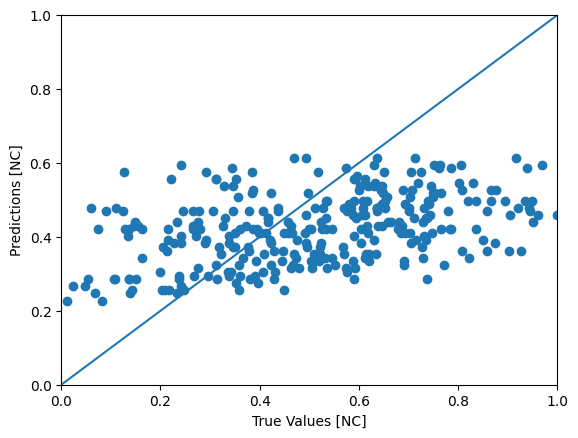

In [256]:
# Day Predictions
test_predictions4 = modelDay.predict(test_features4).flatten()
plt.scatter(test_labels4, test_predictions4)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [257]:
# Month data
# Predictors
predictorsMonth = shuffle.iloc[:,1:2]
print(predictorsMonth[:6])
# Targets
targetsMonth = shuffle.iloc[:,5:6]
print(targetsMonth[:6])

# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data5 = [LRDdf["mo"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers5 = ["mo", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input5 = pd.concat(LRDdf_input_data5, axis=1, keys=LRDdf_input_headers5)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set5 = LRDdf_input5.sample(frac=0.8, random_state=0)
test_set5 = LRDdf_input5.drop(training_set5.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features5 = training_set5.copy()
test_features5 = test_set5.copy()

training_labels5 = training_features5.pop('NUM_COLLISIONS')
test_labels5 = test_features5.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

# I have decided to call the model, modelMonth. We add our normaliser and we are expecting a single output.
modelMonth = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

modelMonth.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelMonth.fit(
    training_features4,
    training_labels4,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelMonth = modelMonth.evaluate(
    test_features4,
    test_labels4, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelMonth)

      mo
1220  11
907   12
2695  11
1506   8
1744   4
1172   9
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745
0.16315419971942902




| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.1676  |
| 2    | 0.1650  |
| 3    | 0.1737  |
| 4    | 0.1822  |
| 5    | 0.1641  |
| 6    | 0.1648  |
| 7    | 0.1636  |
| 8    | 0.1732  |
| 9    | 0.1688  |
| 10   | 0.1748  |
|Average | 0.1698 |

10/10 [==============================] - 0s 5ms/step


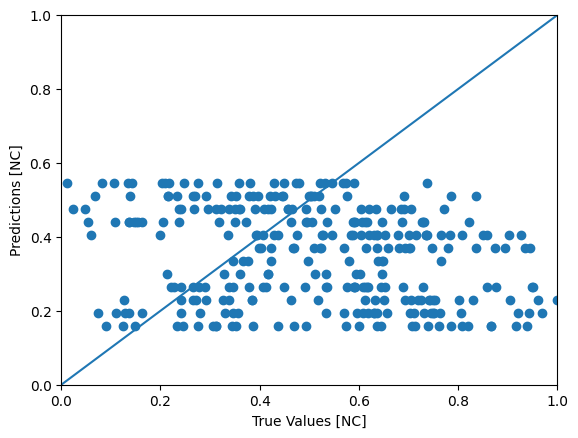

In [258]:
# Month Predictions
test_predictions5 = modelMonth.predict(test_features5).flatten()
plt.scatter(test_labels5, test_predictions5)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [259]:
# Temperature data
# Predictors
predictorsTemp = shuffle.iloc[:,2:3]
print(predictorsTemp[:6])
# Targets
targetsTemp = shuffle.iloc[:,5:6]
print(targetsTemp[:6])

# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data6 = [LRDdf["temp"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers6 = ["temp", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input6 = pd.concat(LRDdf_input_data6, axis=1, keys=LRDdf_input_headers6)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set6 = LRDdf_input6.sample(frac=0.8, random_state=0)
test_set6 = LRDdf_input6.drop(training_set6.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features6 = training_set6.copy()
test_features6 = test_set6.copy()

training_labels6 = training_features6.pop('NUM_COLLISIONS')
test_labels6 = test_features6.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

# I have decided to call the model, modelTemp. We add our normaliser and we are expecting a single output.
modelTemp = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

modelTemp.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelTemp.fit(
    training_features6,
    training_labels6,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelTemp = modelTemp.evaluate(
    test_features6,
    test_labels6, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelTemp)

      temp
1220  58.3
907   50.7
2695  39.7
1506  75.3
1744  46.3
1172  70.8
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745
0.18066862225532532



| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.1811  |
| 2    | 0.3301  |
| 3    | 0.1846  |
| 4    | 0.1932  |
| 5    | 0.2729  |
| 6    | 0.1845  |
| 7    | 0.2679  |
| 8    | 0.4260  |
| 9    | 0.1799  |
| 10   | 0.4107  |
|Average | 0.2631|

10/10 [==============================] - 0s 2ms/step


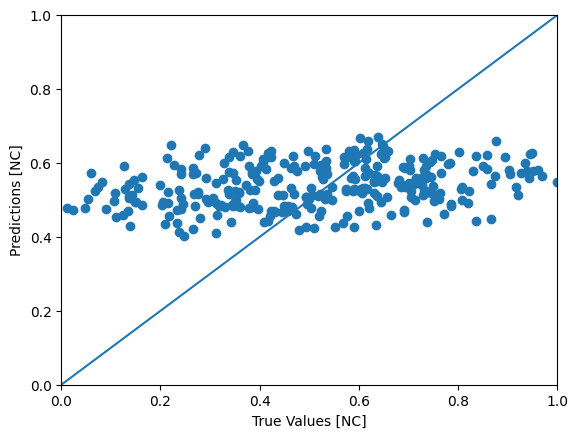

In [260]:
# Temp Predictions
test_predictions6 = modelTemp.predict(test_features6).flatten()
plt.scatter(test_labels6, test_predictions6)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [261]:
# Visibility data
# Predictors
predictors = shuffle.iloc[:,3:4]
print(predictors[:6])
# Targets
targets = shuffle.iloc[:,5:6]
print(targets[:6])

# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data7 = [LRDdf["visib"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers7 = ["visib", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input7 = pd.concat(LRDdf_input_data7, axis=1, keys=LRDdf_input_headers7)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set7 = LRDdf_input7.sample(frac=0.8, random_state=0)
test_set7 = LRDdf_input7.drop(training_set7.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features7 = training_set7.copy()
test_features7 = test_set7.copy()

training_labels7 = training_features7.pop('NUM_COLLISIONS')
test_labels7 = test_features7.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

# I have decided to call the model, modelVisib. We add our normaliser and we are expecting a single output.
modelVisib = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

modelVisib.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelVisib.fit(
    training_features7,
    training_labels7,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelVisib = modelVisib.evaluate(
    test_features7,
    test_labels7, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelVisib)

      visib
1220    9.5
907     2.1
2695   10.0
1506    4.6
1744   10.0
1172   10.0
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745
0.19241738319396973


| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.2667  |
| 2    | 0.1956  |
| 3    | 0.2314  |
| 4    | 0.2133  |
| 5    | 0.1960  |
| 6    | 0.1970  |
| 7    | 0.2118  |
| 8    | 0.1997  |
| 9    | 0.1924  |
| 10   | 0.1886  |
|Average | 0.2093 |

10/10 [==============================] - 0s 2ms/step


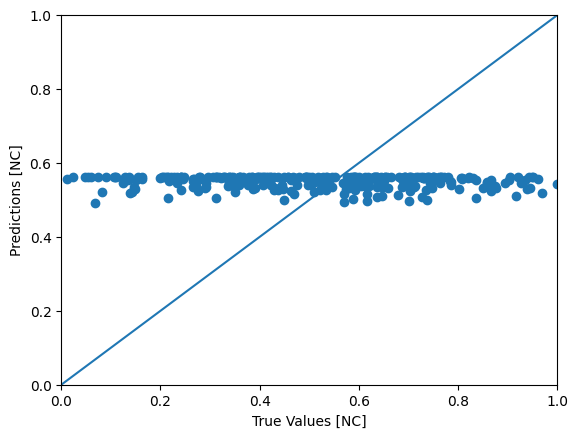

In [262]:
# Visib Predictions
test_predictions7 = modelVisib.predict(test_features7).flatten()
plt.scatter(test_labels7, test_predictions7)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [263]:
# Wind Speed data
# Predictors
predictors = shuffle.iloc[:,4:5]
print(predictors[:6])
# Targets
targets = shuffle.iloc[:,5:6]
print(targets[:6])

# create a dataframe with the inputs and the output at the end using the imported dataframe. Initial test using Time dataset
LRDdf_input_data8 = [LRDdf["wdsp"], LRDdf["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
LRDdf_input_headers8 = ["wdsp", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
LRDdf_input8 = pd.concat(LRDdf_input_data8, axis=1, keys=LRDdf_input_headers8)

# construct a training set for runnign through the model and a test set, we do this by using sample with 0.8 for an 80% training set and 20% for test.
training_set8 = LRDdf_input8.sample(frac=0.8, random_state=0)
test_set8 = LRDdf_input8.drop(training_set8.index)

# copy the datasets and remove the final column, i.e. the output column. We do this using pop.
training_features8 = training_set8.copy()
test_features8 = test_set8.copy()

training_labels8 = training_features8.pop('NUM_COLLISIONS')
test_labels8 = test_features8.pop('NUM_COLLISIONS')

# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

# I have decided to call the model, modelWdsp. We add our normaliser and we are expecting a single output.
modelWdsp = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

modelWdsp.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
history = modelWdsp.fit(
    training_features8,
    training_labels8,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_modelWdsp = modelWdsp.evaluate(
    test_features8,
    test_labels8, verbose=0)

# The mean absolute error of the model can be printed out. Remember, we want to minimise this. It will also vary on each training run due to randomisation.
print(mean_absolute_error_modelWdsp)

      wdsp
1220   7.8
907   10.2
2695  18.4
1506   9.9
1744  10.5
1172  10.1
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
1172        0.470745
0.19783273339271545



| Instance | Mean Absolute Error |
|----------|----------|
| 1    | 0.2072  |
| 2    | 0.2443  |
| 3    | 0.1903  |
| 4    | 0.2163  |
| 5    | 0.2920  |
| 6    | 0.1905  |
| 7    | 0.1968  |
| 8    | 0.2333  |
| 9    | 0.1928  |
| 10   | 0.1995  |
|Average | 0.2163 |

10/10 [==============================] - 0s 2ms/step


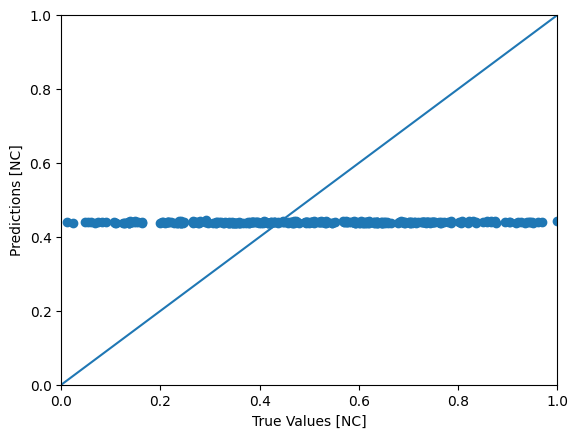

In [264]:
# Wdsp Predictions
test_predictions8 = modelWdsp.predict(test_features8).flatten()
plt.scatter(test_labels8, test_predictions8)
plt.xlabel('True Values [NC]')
plt.ylabel('Predictions [NC]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Individually, both month and day values provided a lower average MAE than the previous target of 0.1716, with day at 0.1712 and month at 0.1698. Interestingly, they both provide more accurate predictions individually than when used together in ModelT, which had an average MAE of 0.1769 - and including the weather data was more beneficial than leaving it out when including both day and month.

While no model produced incredibly accurate predictions, it is clear that while the time of week and year are more impactful for predicting collisions individually, including weather data in a linear model can still provide an improvement to accuracy when examining a wider range of values.

# Initial Deep Neural Network
Preparing values for deep neural network creation. We will use the shuffle value created during the linear regression model for the data, with predictors and targets chosen in the same way. However, this time we create train and test sets earlier.

In [265]:
predictors_train = shuffle.iloc[:,0:5]
predictors_test = shuffle.iloc[:,0:5]
print(predictors_test)

      day  mo  temp  visib  wdsp
1220    1  11  58.3    9.5   7.8
907     3  12  50.7    2.1  10.2
2695    6  11  39.7   10.0  18.4
1506    7   8  75.3    4.6   9.9
1744    7   4  46.3   10.0  10.5
...   ...  ..   ...    ...   ...
1372    6   4  50.4    5.0   8.5
886     3  12  51.2    6.1  14.5
2129    7   4  50.5    9.2   5.9
1374    1   4  36.5    8.2  10.3
1135    7   8  67.0    9.2  13.1

[1520 rows x 5 columns]


In [266]:
targets_train = shuffle.iloc[:,5:6]
targets_test = shuffle.iloc[:,5:6]
print(targets_train)

      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
...              ...
1372        0.450820
886         0.503049
2129        0.136842
1374        0.685792
1135        0.231383

[1520 rows x 1 columns]


Scaling of target is not required as NUM_COLLISIONS is already normalised. Get the number of predictors and outputs.

In [267]:
nppredictors = len(predictors_train.columns);
print(len(predictors_test.columns))
noutputs = 1;

5


A normalisation layer is created for the predictors to convert values to be between 0 and standard deviation of 1.

In [268]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(predictors_train))
print(normalizer.mean.numpy())

[[ 3.9407897  6.525658  49.02954    8.280788  12.135131 ]]


Model created, passing through two dense layers of 64 units, then through a final layer with 1 unit for a single output.

In [269]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.01))

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_31 (Normaliz  (None, 5)                 11        
 ation)                                                          
                                                                 
 dense_60 (Dense)            (None, 64)                384       
                                                                 
 dense_61 (Dense)            (None, 64)                4160      
                                                                 
 dense_62 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4620 (18.05 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 11 (48.00 Byte)
_________________________________________________________________


Model training- no scaling required on targets as is already normalised. Model is trained to 50 epochs for initial testing, but increased to 100 epochs later.

In [270]:
history = model.fit(predictors_train, targets_train, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.0695
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0350
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 12/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 13/100
48/48 [=================

Model loss evaluated, and predictions compared to real values.

In [271]:
results = model.evaluate(predictors_test, targets_test,verbose=0)
print(results)

0.018018309026956558


Similarly to the Linear Regression models, the loss will vary between runs. To understand which model produces the best results, each model will be run several times. Due to the increased number of variable factors, the initial model testing all values will be tested on a variety of factors, with the loss recorded to 4 decimal places. This will be used to determine which model structure will be used for further DNN model generation.

The different variences used for model generation are:

*   2 Dense layers of 64 units, 50 Epochs
*   2 Dense layers of 64 units, 100 Epochs
*   2 Dense layers of 48 units, 50 Epochs
*   2 Dense layers of 48 units, 100 Epochs


| Instance | 2D64 - 50 | 2D64 - 100  | 2D48 - 50  |  2D48 - 100 |
|----------|-----------|-------------|------------|-------------|
| 1        | 0.0187    | 0.0110      | 0.0123     | 0.0100
| 2        | 0.0157    | 0.0089      | 0.0175     | 0.0108
| 3        | 0.0154    | 0.0092      | 0.0116     | 0.0100
| 4        | 0.0128    | 0.0077      | 0.0122     | 0.0108
| 5        | 0.0117    | 0.0078      | 0.0109     | 0.0117

It is clear that the 64 unit layer with 100 epochs provides the least loss of the test models. While further experimentation could refine the model further, with varying layer types or activations, for the purposes of this assignment the 2D64-100 model will suffice for testing. With a model structure determined, more loss data for the first model is recorded.

| Instance | Model Loss|
|----------|-----------|
| 1        | 0.0110    |
| 2        | 0.0089    |
| 3        | 0.0092    |
| 4        | 0.0077    |
| 5        | 0.0078    |
| 6        | 0.0114    |
| 7        | 0.0086    |
| 8        | 0.0096    |
| 9        | 0.0088    |
| 10       | 0.0092    |
| Average  | 0.0092    |

# Additional Deep Neural Network Models

Multiple additional Deep Neural Network models will be created and tested in order to test the accuracy of various combinations of values, as was performed with the Linear Regression Models. No immediate comparisons will be performed.


# Weather
Model values: Average Temperature, Visibility, and Average Wind Speed.

In [272]:
predictors_train2 = shuffle.iloc[:,2:5]
predictors_test2 = shuffle.iloc[:,2:5]
print(predictors_test2)

targets_train2 = shuffle.iloc[:,5:6]
targets_test2 = shuffle.iloc[:,5:6]
print(targets_train2)

nppredictors = len(predictors_train2.columns);
print(len(predictors_test2.columns))
noutputs = 1;

normalizer2 = tf.keras.layers.Normalization(axis=-1)
normalizer2.adapt(np.array(predictors_train2))
print(normalizer2.mean.numpy())

      temp  visib  wdsp
1220  58.3    9.5   7.8
907   50.7    2.1  10.2
2695  39.7   10.0  18.4
1506  75.3    4.6   9.9
1744  46.3   10.0  10.5
...    ...    ...   ...
1372  50.4    5.0   8.5
886   51.2    6.1  14.5
2129  50.5    9.2   5.9
1374  36.5    8.2  10.3
1135  67.0    9.2  13.1

[1520 rows x 3 columns]
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
...              ...
1372        0.450820
886         0.503049
2129        0.136842
1374        0.685792
1135        0.231383

[1520 rows x 1 columns]
3
[[49.02954   8.280788 12.135131]]


In [273]:
modelW = tf.keras.Sequential([
    normalizer2,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

modelW.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.01))

modelW.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_32 (Normaliz  (None, 3)                 7         
 ation)                                                          
                                                                 
 dense_63 (Dense)            (None, 64)                256       
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dense_65 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4488 (17.54 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 7 (32.00 Byte)
_________________________________________________________________


In [274]:
history = modelW.fit(predictors_train2, targets_train2, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 4ms/step - loss: 0.0699
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 7/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0462
Epoch 9/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 10/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 11/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 12/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 13/100
48/48 [=================

In [275]:
results = modelW.evaluate(predictors_test2, targets_test2,verbose=0)
print(results)

0.04508395493030548


| Instance | Model Loss|
|----------|-----------|
| 1        | 0.0419    |
| 2        | 0.0405    |
| 3        | 0.0396    |
| 4        | 0.0403    |
| 5        | 0.0393    |
| 6        | 0.0386    |
| 7        | 0.0394    |
| 8        | 0.0390    |
| 9        | 0.0392    |
| 10       | 0.0390    |
| Average  | 0.0397    |

# Season
Model values: Month and Average Temperature

In [276]:
predictors_train3 = shuffle.iloc[:,1:3]
predictors_test3 = shuffle.iloc[:,1:3]
print(predictors_test3)

targets_train3 = shuffle.iloc[:,5:6]
targets_test3 = shuffle.iloc[:,5:6]
print(targets_train3)

nppredictors = len(predictors_train3.columns);
print(len(predictors_test3.columns))
noutputs = 1;

normalizer3 = tf.keras.layers.Normalization(axis=-1)
normalizer3.adapt(np.array(predictors_train3))
print(normalizer3.mean.numpy())

      mo  temp
1220  11  58.3
907   12  50.7
2695  11  39.7
1506   8  75.3
1744   4  46.3
...   ..   ...
1372   4  50.4
886   12  51.2
2129   4  50.5
1374   4  36.5
1135   8  67.0

[1520 rows x 2 columns]
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
...              ...
1372        0.450820
886         0.503049
2129        0.136842
1374        0.685792
1135        0.231383

[1520 rows x 1 columns]
2
[[ 6.525658 49.02954 ]]


In [277]:
modelS = tf.keras.Sequential([
    normalizer3,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

modelS.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.01))

modelS.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_33 (Normaliz  (None, 2)                 5         
 ation)                                                          
                                                                 
 dense_66 (Dense)            (None, 64)                192       
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 dense_68 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4422 (17.28 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


In [278]:
history = modelS.fit(predictors_train3, targets_train3, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.0664
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0450
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0451
Epoch 12/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 13/100
48/48 [=================

In [279]:
results = modelS.evaluate(predictors_test3, targets_test3,verbose=0)
print(results)

0.0423736535012722


| Instance | Model Loss|
|----------|-----------|
| 1        | 0.0420    |
| 2        | 0.0416    |
| 3        | 0.0415    |
| 4        | 0.0410    |
| 5        | 0.0429   |
| 6        | 0.0411    |
| 7        | 0.0410    |
| 8        | 0.0408    |
| 9        | 0.0409   |
| 10       | 0.0408    |
| Average  | 0.0414    |

# Time
Model Values: Month and Day of Week

In [280]:
predictors_train4 = shuffle.iloc[:,0:2]
predictors_test4 = shuffle.iloc[:,0:2]
print(predictors_test4)

targets_train4 = shuffle.iloc[:,5:6]
targets_test4 = shuffle.iloc[:,5:6]
print(targets_train4)

nppredictors = len(predictors_train4.columns);
print(len(predictors_test4.columns))
noutputs = 1;

normalizer4 = tf.keras.layers.Normalization(axis=-1)
normalizer4.adapt(np.array(predictors_train4))
print(normalizer4.mean.numpy())

      day  mo
1220    1  11
907     3  12
2695    6  11
1506    7   8
1744    7   4
...   ...  ..
1372    6   4
886     3  12
2129    7   4
1374    1   4
1135    7   8

[1520 rows x 2 columns]
      NUM_COLLISIONS
1220        0.561170
907         0.350610
2695        0.330709
1506        0.243169
1744        0.218509
...              ...
1372        0.450820
886         0.503049
2129        0.136842
1374        0.685792
1135        0.231383

[1520 rows x 1 columns]
2
[[3.9407897 6.525658 ]]


In [281]:
modelT = tf.keras.Sequential([
    normalizer4,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

modelT.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.01))

modelT.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_34 (Normaliz  (None, 2)                 5         
 ation)                                                          
                                                                 
 dense_69 (Dense)            (None, 64)                192       
                                                                 
 dense_70 (Dense)            (None, 64)                4160      
                                                                 
 dense_71 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4422 (17.28 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


In [282]:
history = modelT.fit(predictors_train4, targets_train4, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 0.0520
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 7/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 9/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0267
Epoch 10/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0268
Epoch 11/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0272
Epoch 12/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 13/100
48/48 [=================

In [283]:
results = modelT.evaluate(predictors_test4, targets_test4,verbose=0)
print(results)

0.024213561788201332


| Instance | Model Loss|
|----------|-----------|
| 1        | 0.0247    |
| 2        | 0.0242    |
| 3        | 0.0239    |
| 4        | 0.0242    |
| 5        | 0.0238   |
| 6        | 0.0239    |
| 7        | 0.0245    |
| 8        | 0.0238    |
| 9        | 0.0242   |
| 10       | 0.0240    |
| Average  | 0.0241    |

# Comparing Deep Neural Network Models

Unlike the Linear Regression Models, the Deep Neural Network for the initial model is vastly superior to any of the other models for minimising loss.



| Instance    |  Model  |  ModelW  |  ModelS  |  ModelT  |
|-------------|----------|----------|----------|----------|
| 1           |  0.0110  |  0.0419  |  0.0420  |  0.0247  |
| 2           |  0.0089  |  0.0405  |  0.0416  |  0.0242  |
| 3           |  0.0092  |  0.0396  |  0.0415  |  0.0239  |
| 4           |  0.0077  |  0.0403  |  0.0410  |  0.0242  |
| 5           |  0.0078  |  0.0393  |  0.0429  |  0.0238  |
| 6           |  0.0114  |  0.0386  |  0.0411  |  0.0239  |
| 7           |  0.0086  |  0.0394  |  0.0410  |  0.0245  |
| 8           |  0.0096  |  0.0390  |  0.0408  |  0.0238  |
| 9           |  0.0088  |  0.0392  |  0.0409  |  0.0242  |
| 10          |  0.0092  |  0.0390  |  0.0408  |  0.0240  |
| Average Loss |  0.0092  |  0.0397  |  0.0414  |  0.0241  |


Model predictions are plotted against true values.

48/48 [==============================] - 0s 2ms/step


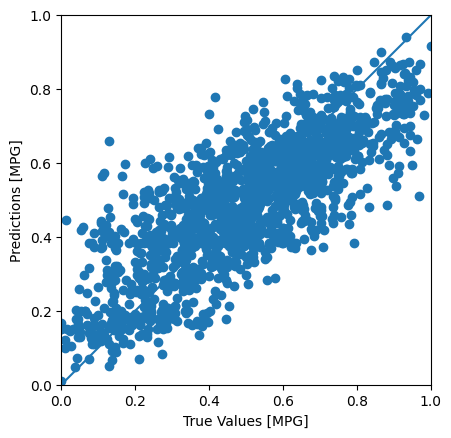

In [284]:
predictions = model.predict(predictors_test)

import matplotlib.pyplot as plt
a = plt.axes(aspect='equal')
plt.scatter(targets_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Using all available data values (day, mo, temp, visib, wdsp), a very accurate model emerges, providing much higher accuracy than any of the other models created, whether linear regression or deep neural network.

This indicates a strong non-linear relationship, allowing us to fairly accurately predict the number of collisions using these values in a Deep Neural Network model.

48/48 [==============================] - 0s 2ms/step


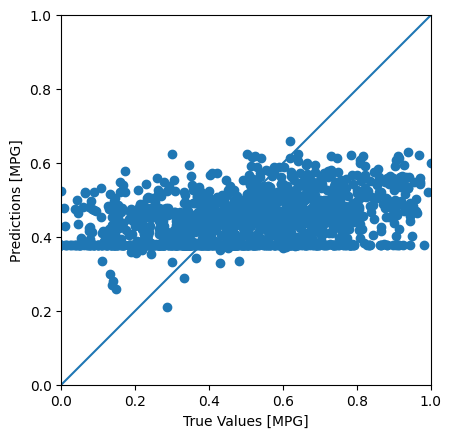

In [285]:
predictions = modelW.predict(predictors_test2)

import matplotlib.pyplot as plt
a = plt.axes(aspect='equal')
plt.scatter(targets_test2, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Weather model has a distinct line of outlier predictions at 0.4, though discounting those the overall accuracy is surprisingly high. Unfortunately the outliers as well as many lower true values predicting as high destroy the effectiveness of this model.

48/48 [==============================] - 0s 2ms/step


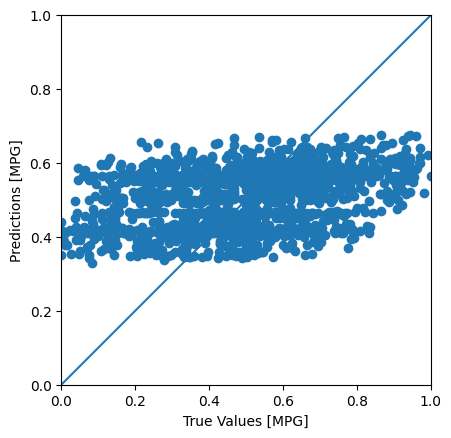

In [286]:
predictions = modelS.predict(predictors_test3)

import matplotlib.pyplot as plt
a = plt.axes(aspect='equal')
plt.scatter(targets_test3, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Season model shows a very small trend towards the true value, but the accuracy appears as low as some of the linear models.

48/48 [==============================] - 0s 2ms/step


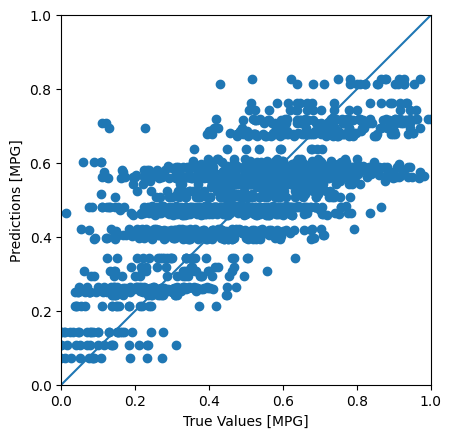

In [287]:
predictions = modelT.predict(predictors_test4)

import matplotlib.pyplot as plt
a = plt.axes(aspect='equal')
plt.scatter(targets_test4, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

The Time model, while lacking in precise accuracy, does at least follow an observable pattern and follows the true values within a certain degree. It is significantly more accurate than either the Weather or Season model.

Both Model and ModelT contain the 'day' value, which appears to have a strong relationship with the 'NUM_COLLISIONS' value. However, it is clear that it is not a linear relationship, and using the day value alone is not suited for a deep neural network.

It is only when the day value is paired with other time and weather data that a strong DNN model can be produced.

# Conclusion
It became clear through thorough testing that there is no simple linear relationship between the number of collisions and any time or weather value. Linear Regression models were of low accuracy and unhelpful for predicting the number of collisions through any combination of values.

However, a full-band Deep Neural Network model proved effective; while not perfect, it generated a decently accurate model which could in theory be refined further to produce very accurate results. It should be noted that while the weather data included did not appear to produce any noticeable correlation for predictions by itself, it did provide a noticable improvement to model accuracy when used alongside time data when compared to the Time model alone.

This indicates that there is in fact some non-linear relationship between the weather values gathered and the number of collisions, though it requires modelling with other relevant data to produce an accurate and useful prediction DNN model.